# DengAI Prediction

An attempt is being made to create a model that can predict the number of Dengue fever cases based on a specific week of the year. The data has already been divided into training and testing sets and labeled accordingly.

In [189]:
# import the basic necessery libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [190]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [191]:
# read all the data set
dengue_label_data = pd.read_csv('dengue_labels_train.csv')
dengue_feature_train_data = pd.read_csv('dengue_features_train.csv')
dengue_feature_test_data = pd.read_csv('dengue_features_test.csv')

from IPython.display import display, HTML

# Define CSS styles for scrollable tables
css_style = """
<style>
table {
    font-family: Arial, sans-serif;
    border-collapse: collapse;
 
}

td, th {
    border: 1px solid #dddddd;
    text-align: center;
    padding: 4px;
}

</style>
"""

# Display the DataFrame
display(HTML(css_style))
print("Dengue Label Data:")
display(dengue_label_data.head())

print("\nDengue Feature Train Data:")
display(dengue_feature_train_data.head())

print("\nDengue Feature Test Data:")
display(dengue_feature_test_data.head())


Dengue Label Data:


,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6



Dengue Feature Train Data:


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8



Dengue Feature Test Data:


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


### Abbreiviations

city – City abbreviations: sj for San Juan and iq for Iquitos\
week_start_date – Date given in yyyy-mm-dd format

ndvi_se – Pixel southeast of city centroid\
ndvi_sw – Pixel southwest of city centroid\
ndvi_ne – Pixel northeast of city centroid\
ndvi_nw – Pixel northwest of city centroid

precipitation_amt_mm – Total precipitation

reanalysis_sat_precip_amt_mm – Total precipitation\
reanalysis_dew_point_temp_k – Mean dew point temperature\
reanalysis_air_temp_k – Mean air temperature\
reanalysis_relative_humidity_percent – Mean relative humidity\
reanalysis_specific_humidity_g_per_kg – Mean specific humidity\
reanalysis_precip_amt_kg_per_m2 – Total precipitation\
reanalysis_max_air_temp_k – Maximum air temperature\
reanalysis_min_air_temp_k – Minimum air temperature\
reanalysis_avg_temp_k – Average air temperature\
reanalysis_tdtr_k – Diurnal temperature range

station_max_temp_c – Maximum temperature\
station_min_temp_c – Minimum temperature\
station_avg_temp_c – Average temperature\
station_precip_mm – Total precipitation\
station_diur_temp_rng_c – Diurnal temperature range

In [192]:
dengue_feature_train_data.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

<Axes: xlabel='year', ylabel='reanalysis_air_temp_k'>

<Axes: xlabel='year', ylabel='reanalysis_air_temp_k'>

<Axes: xlabel='year', ylabel='reanalysis_air_temp_k'>

<Axes: xlabel='year', ylabel='reanalysis_air_temp_k'>

Text(0.5, 1.0, 'Temperature-related Features in Kelvin')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Value')

<Axes: xlabel='year', ylabel='station_avg_temp_c'>

<Axes: xlabel='year', ylabel='station_avg_temp_c'>

<Axes: xlabel='year', ylabel='station_avg_temp_c'>

Text(0.5, 1.0, 'Temperature-related Features in Celsius')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Value')

<Axes: xlabel='year', ylabel='reanalysis_relative_humidity_percent'>

<Axes: xlabel='year', ylabel='reanalysis_relative_humidity_percent'>

Text(0.5, 1.0, 'Humidity-related Features')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Value')

<Axes: xlabel='year', ylabel='precipitation_amt_mm'>

<Axes: xlabel='year', ylabel='precipitation_amt_mm'>

<Axes: xlabel='year', ylabel='precipitation_amt_mm'>

<Axes: xlabel='year', ylabel='precipitation_amt_mm'>

Text(0.5, 1.0, 'Precipitation-related Features')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Value')

<Axes: xlabel='year', ylabel='ndvi_ne'>

<Axes: xlabel='year', ylabel='ndvi_ne'>

<Axes: xlabel='year', ylabel='ndvi_ne'>

<Axes: xlabel='year', ylabel='ndvi_ne'>

Text(0.5, 1.0, 'Vegetation-related Features')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Value')

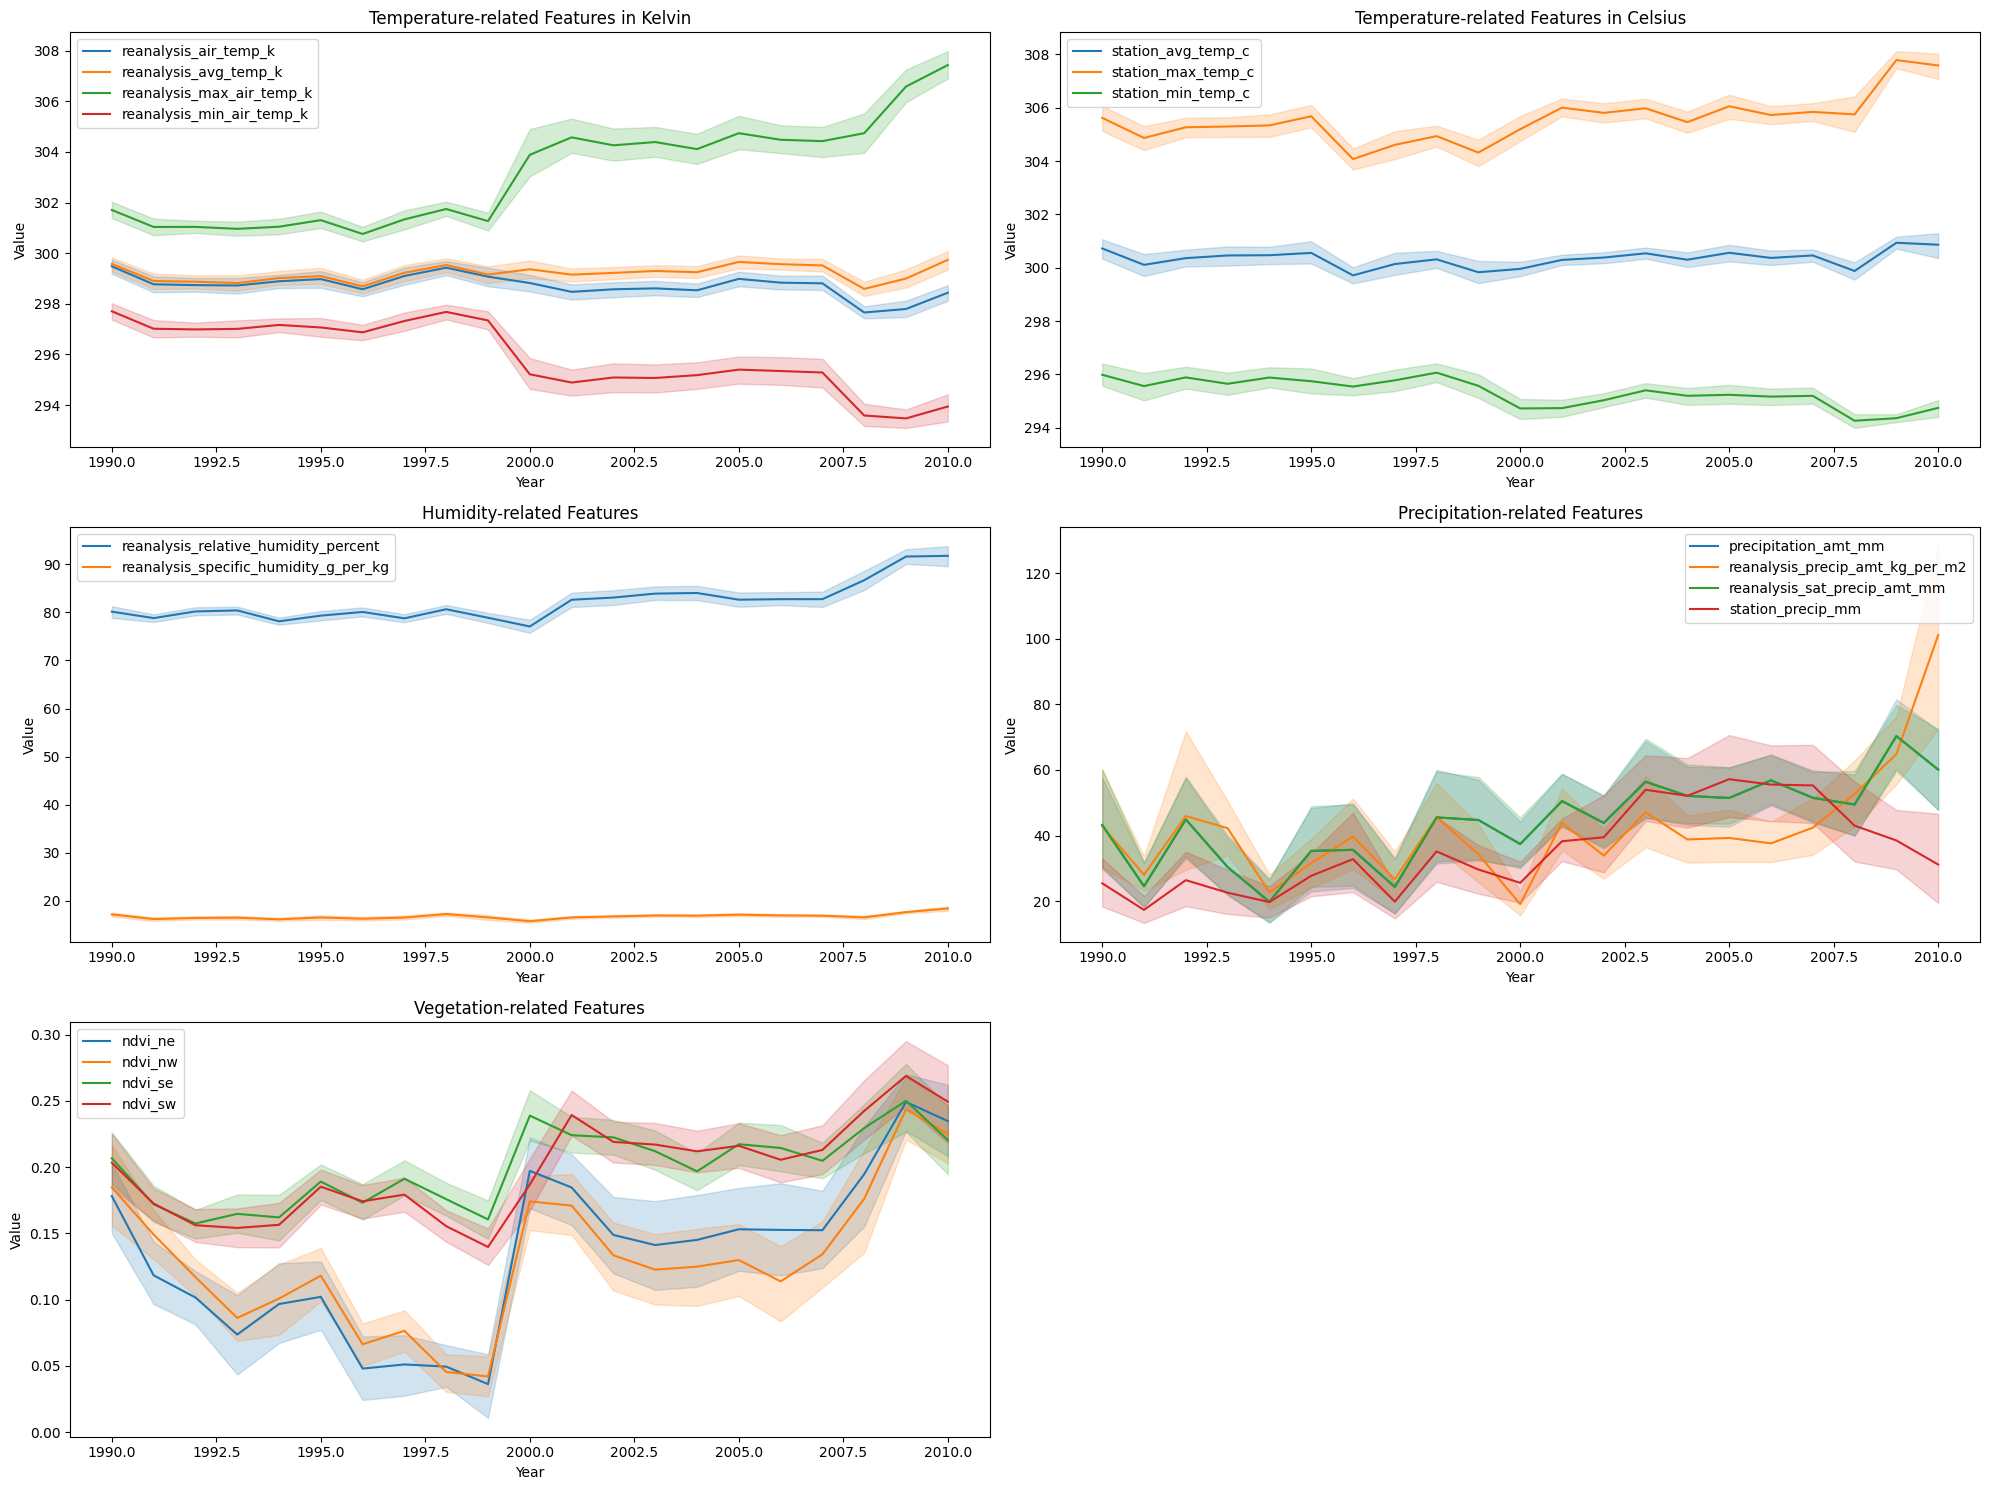

In [193]:
import matplotlib.pyplot as plt
import seaborn as sns
# convert temp to Kelvin for all features
dengue_feature_train_data[['station_avg_temp_c', 'station_max_temp_c', 'station_min_temp_c']] += 273.15
dengue_feature_test_data[['station_avg_temp_c', 'station_max_temp_c', 'station_min_temp_c']] += 273.15
# Define groups of similar features
reanalysis_temp = ['reanalysis_air_temp_k', 'reanalysis_avg_temp_k', 'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k']
station_temp = ['station_avg_temp_c', 'station_max_temp_c', 'station_min_temp_c']
humidity_features = ['reanalysis_relative_humidity_percent', 'reanalysis_specific_humidity_g_per_kg']
precipitation_features = ['precipitation_amt_mm', 'reanalysis_precip_amt_kg_per_m2', 'reanalysis_sat_precip_amt_mm', 'station_precip_mm']
vegetation_features = ['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw']

# Create subplots for each feature group
fig, axs = plt.subplots(3, 2, figsize=(20, 15))

# Plot temperature-related features in Kelvin
for column in reanalysis_temp:
    sns.lineplot(data=dengue_feature_train_data, x='year', y=column, label=column, ax=axs[0, 0])
axs[0, 0].set_title('Temperature-related Features in Kelvin')
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('Value')
axs[0, 0].legend()

# Plot temperature-related features in Celsius
for column in station_temp:
    sns.lineplot(data=dengue_feature_train_data, x='year', y=column, label=column, ax=axs[0, 1])
axs[0, 1].set_title('Temperature-related Features in Celsius')
axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('Value')
axs[0, 1].legend()

# Plot humidity-related features
for column in humidity_features:
    sns.lineplot(data=dengue_feature_train_data, x='year', y=column, label=column, ax=axs[1, 0])
axs[1, 0].set_title('Humidity-related Features')
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Value')
axs[1, 0].legend()

# Plot precipitation-related features
for column in precipitation_features:
    sns.lineplot(data=dengue_feature_train_data, x='year', y=column, label=column, ax=axs[1, 1])
axs[1, 1].set_title('Precipitation-related Features')
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('Value')
axs[1, 1].legend()

# Plot vegetation-related features
for column in vegetation_features:
    sns.lineplot(data=dengue_feature_train_data, x='year', y=column, label=column, ax=axs[2, 0])
axs[2, 0].set_title('Vegetation-related Features')
axs[2, 0].set_xlabel('Year')
axs[2, 0].set_ylabel('Value')
axs[2, 0].legend()

# Remove the empty subplot
fig.delaxes(axs[2, 1])

plt.tight_layout()
plt.show()



array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

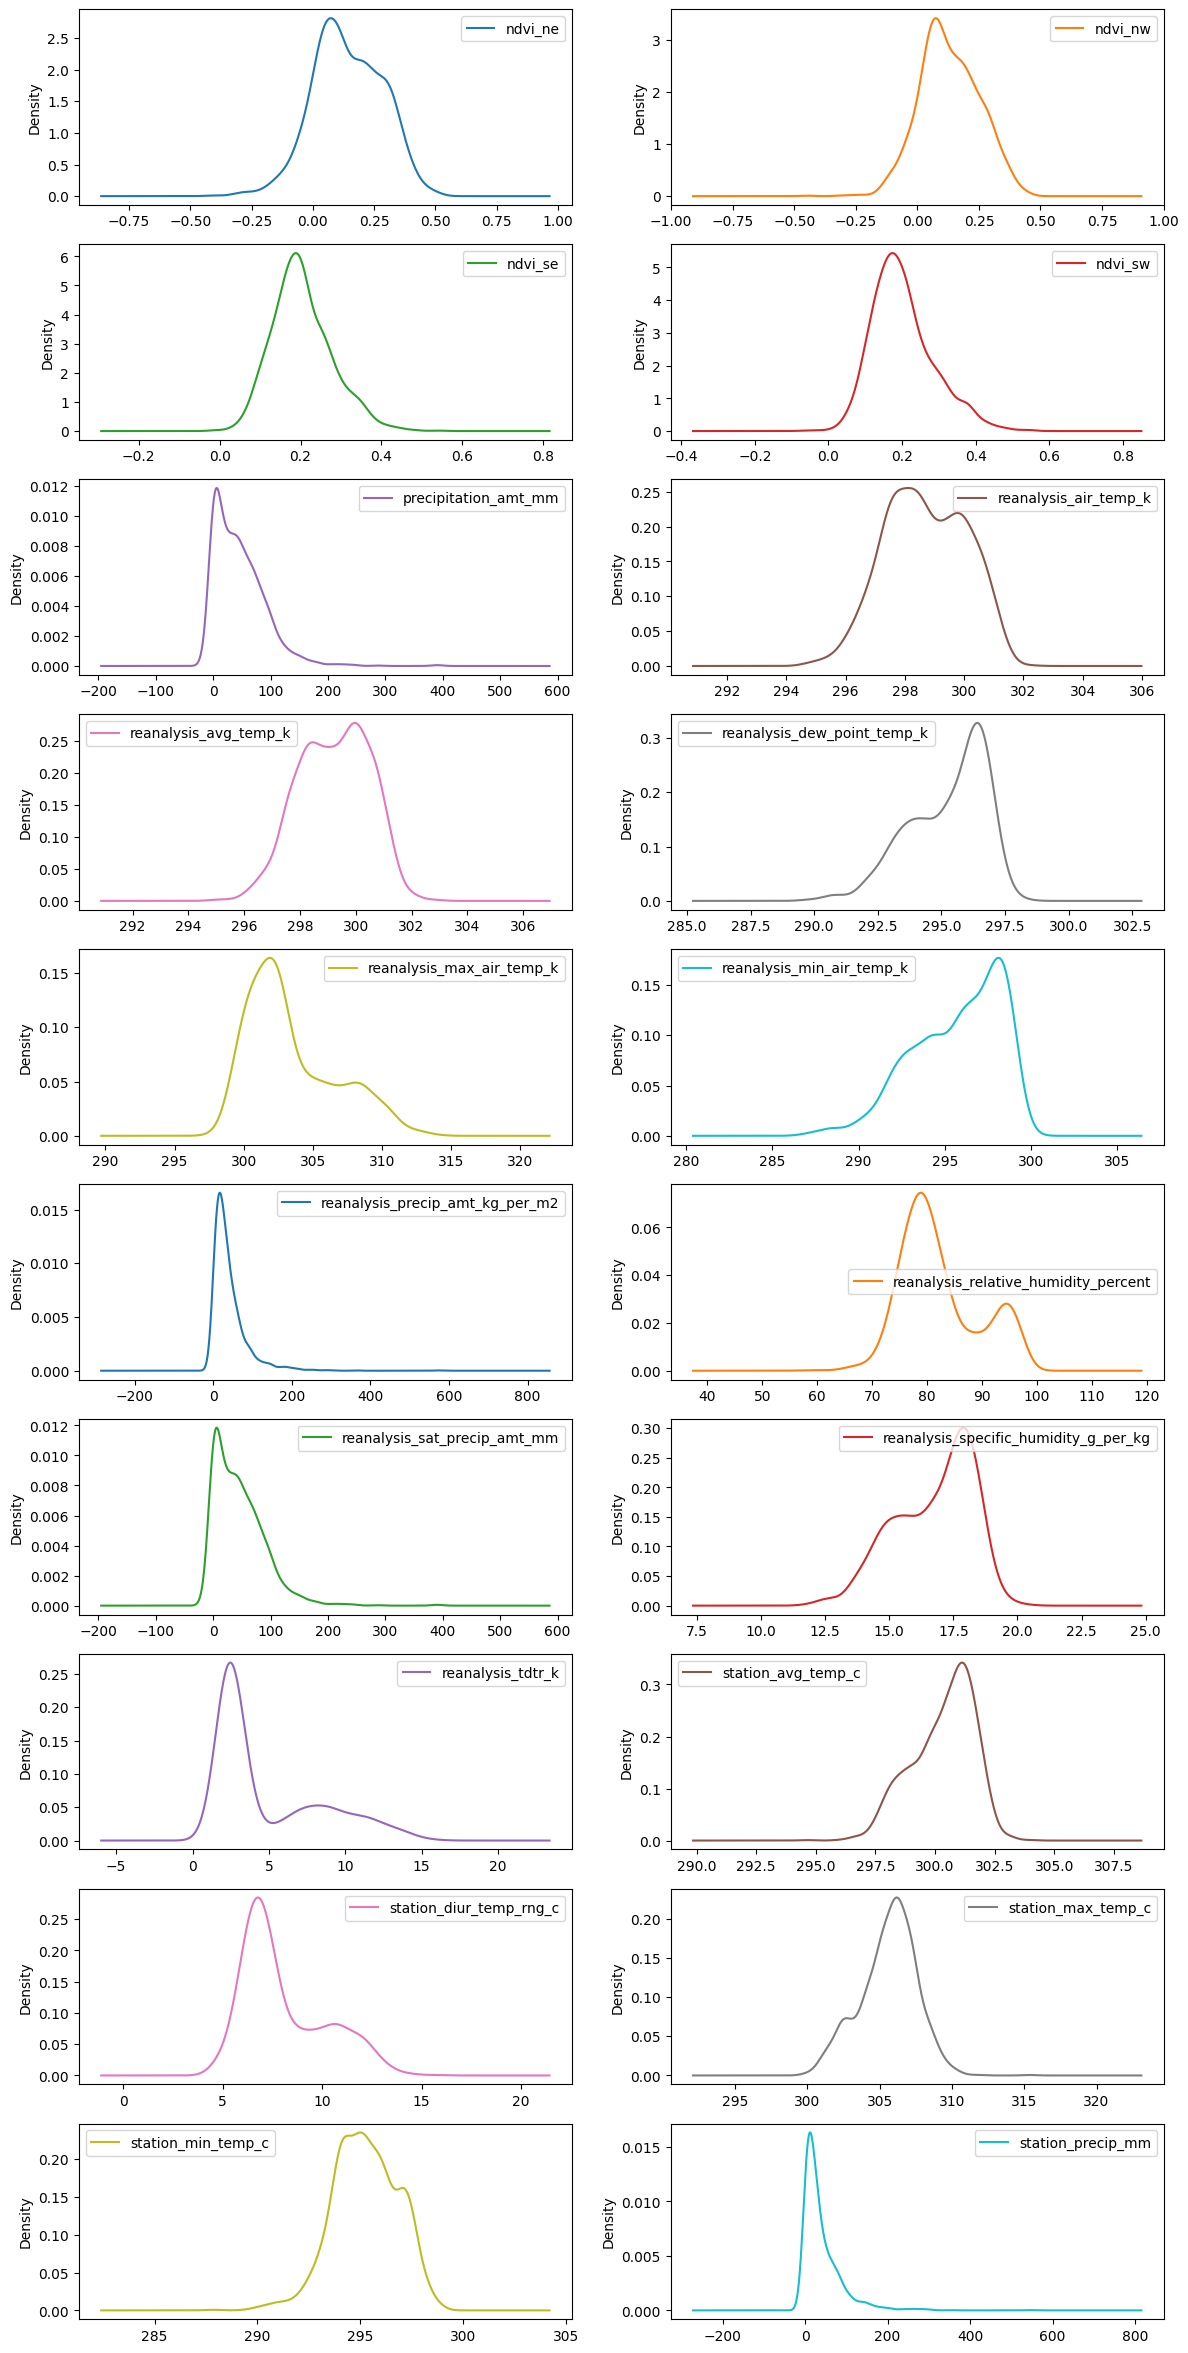

In [194]:
(dengue_feature_train_data.drop(['year', 'weekofyear'], axis=1)
    .plot(kind='kde', subplots=True, figsize=(14, 30), layout=(10, 2), sharex=False))

In [195]:
# Display the DataFrame descriptions

print("Dengue Label Data Description:")
display(dengue_label_data.describe())

print("\nDengue Feature Train Data Description:")
display(dengue_feature_train_data.describe())

print("\nDengue Feature Test Data Description:")
display(dengue_feature_test_data.describe())

Dengue Label Data Description:


,year,weekofyear,total_cases
count,1456.000000,1456.000000,1456.000000
mean,2001.031593,26.503434,24.675137
std,5.408314,15.019437,43.596000
min,1990.000000,1.000000,0.000000
25%,1997.000000,13.750000,5.000000
50%,2002.000000,26.500000,12.000000
75%,2005.000000,39.250000,28.000000
max,2010.000000,53.000000,461.000000



Dengue Feature Train Data Description:


,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,...,1446.000000,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,...,40.151819,82.161959,45.760388,16.746427,4.903754,300.335783,8.059328,305.602437,295.252150,39.326360
std,5.408314,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,...,43.434399,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,...,0.000000,57.787143,0.000000,11.715714,1.357143,294.550000,4.528571,299.850000,287.850000,0.000000
25%,1997.000000,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,...,13.055000,77.177143,9.800000,15.557143,2.328571,299.450000,6.514286,304.250000,294.250000,8.700000
50%,2002.000000,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,...,27.245000,80.301429,38.340000,17.087143,2.857143,300.564286,7.300000,305.950000,295.350000,23.850000
75%,2005.000000,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,...,52.200000,86.357857,70.235000,17.978214,7.625000,301.307143,9.566667,307.050000,296.450000,53.900000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,...,570.500000,98.610000,390.600000,20.461429,16.028571,303.950000,15.800000,315.350000,298.750000,543.300000



Dengue Feature Test Data Description:


,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,416.000000,416.000000,373.000000,405.000000,415.000000,415.000000,414.000000,414.000000,414.000000,414.000000,...,414.000000,414.000000,414.000000,414.000000,414.000000,404.000000,404.000000,413.000000,407.000000,411.000000
mean,2010.766827,26.439904,0.126050,0.126803,0.207702,0.201721,38.354324,298.818295,299.353071,295.419179,...,42.171135,82.499810,38.354324,16.927088,5.124569,300.519587,7.810991,305.684625,295.518550,34.278589
std,1.434835,14.978257,0.164353,0.141420,0.079102,0.092028,35.171126,1.469501,1.306233,1.523099,...,48.909514,7.378243,35.171126,1.557868,3.542870,1.232608,2.449718,1.920429,1.731437,34.655966
min,2008.000000,1.000000,-0.463400,-0.211800,0.006200,-0.014671,0.000000,294.554286,295.235714,290.818571,...,0.000000,64.920000,0.000000,12.537143,1.485714,297.307143,4.042857,300.350000,287.350000,0.000000
25%,2010.000000,13.750000,-0.001500,0.015975,0.148670,0.134079,8.175000,297.751429,298.323214,294.335714,...,9.430000,77.397143,8.175000,15.792857,2.446429,299.664286,5.928571,304.250000,294.350000,9.100000
50%,2011.000000,26.000000,0.110100,0.088700,0.204171,0.186471,31.455000,298.547143,299.328571,295.825000,...,25.850000,80.330000,31.455000,17.337143,2.914286,300.633333,6.642857,305.950000,295.350000,23.600000
75%,2012.000000,39.000000,0.263329,0.242400,0.254871,0.253243,57.772500,300.240357,300.521429,296.643571,...,56.475000,88.328929,57.772500,18.174643,8.171429,301.469048,9.812500,307.050000,296.450000,47.750000
max,2013.000000,53.000000,0.500400,0.649000,0.453043,0.529043,169.340000,301.935714,303.328571,297.794286,...,301.400000,97.982857,169.340000,19.598571,14.485714,303.421429,14.725000,311.550000,299.850000,212.000000


There are some missing values can be observe from the describtion of dataset\
Find the missing data and fill them with there nearest values

In [196]:
# display the null values count

print("Dengue Label Data null count:\n", 
      dengue_label_data.isnull().sum())

print("\nDengue Feature Train Data null count:\n",
      dengue_feature_train_data.isnull().sum())

print("\nDengue Feature Test Data null count:\n",
      dengue_feature_test_data.isnull().sum())

Dengue Label Data null count:
 city           0
year           0
weekofyear     0
total_cases    0
dtype: int64

Dengue Feature Train Data null count:
 city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                     

In [197]:
# advanced techniques like interpolation
dengue_feature_train_data.interpolate(method='linear', inplace=True)
dengue_feature_test_data.interpolate(method='linear', inplace=True)
dengue_label_data.interpolate(method='linear', inplace=True)

C:\Users\nilak\AppData\Local\Temp\ipykernel_18220\668277097.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  dengue_feature_train_data.interpolate(method='linear', inplace=True)
C:\Users\nilak\AppData\Local\Temp\ipykernel_18220\668277097.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  dengue_feature_test_data.interpolate(method='linear', inplace=True)
C:\Users\nilak\AppData\Local\Temp\ipykernel_18220\668277097.py:4: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  dengue_label_data.interpolate(method='linear', inplace=True)


In [198]:
# Convert 'week_start_date' to datetime object
dengue_feature_train_data['week_start_date'] = pd.to_datetime(dengue_feature_train_data['week_start_date'])
dengue_feature_test_data['week_start_date'] = pd.to_datetime(dengue_feature_test_data['week_start_date'])
# Extract additional features like month or day of the week
dengue_feature_train_data['month'] = dengue_feature_train_data['week_start_date'].dt.month
dengue_feature_train_data['day_of_week'] = dengue_feature_train_data['week_start_date'].dt.dayofweek
dengue_feature_test_data['month'] = dengue_feature_test_data['week_start_date'].dt.month
dengue_feature_test_data['day_of_week'] = dengue_feature_test_data['week_start_date'].dt.dayofweek

# Calculate last week temp feature for dengue cases
dengue_feature_train_data['previous_week_temp'] = dengue_feature_train_data['reanalysis_avg_temp_k'].shift(1)
dengue_feature_test_data['previous_week_temp'] = dengue_feature_test_data['reanalysis_avg_temp_k'].shift(1)

# Calculte the mean temp
dengue_feature_train_data['station_mean_temp'] = dengue_feature_train_data[['station_avg_temp_c', 'station_min_temp_c','station_max_temp_c']].mean(axis=1)
dengue_feature_test_data['station_mean_temp'] = dengue_feature_test_data[['station_avg_temp_c', 'station_min_temp_c','station_max_temp_c']].mean(axis=1)

# Calculate reanalysis mean temp
dengue_feature_train_data["reanalysis_mean_temp"] = dengue_feature_train_data[['reanalysis_air_temp_k', 'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k']].mean(axis=1)
dengue_feature_test_data["reanalysis_mean_temp"] = dengue_feature_test_data[['reanalysis_air_temp_k', 'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k']].mean(axis=1)

# Calculate ndvi mean
dengue_feature_train_data['ndvi'] = dengue_feature_train_data[['ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw']].mean(axis=1)
dengue_feature_test_data['ndvi'] = dengue_feature_test_data[['ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw']].mean(axis=1)

# Calculate rolling mean of precipitation
dengue_feature_train_data['rolling_precip_mean'] = dengue_feature_train_data['precipitation_amt_mm'].rolling(window=5).mean()
dengue_feature_test_data['rolling_precip_mean'] = dengue_feature_test_data['precipitation_amt_mm'].rolling(window=5).mean()
dengue_feature_train_data['rolling_precip_mean_station'] = dengue_feature_train_data['station_precip_mm'].rolling(window=5).mean()
dengue_feature_test_data['rolling_precip_mean_station'] = dengue_feature_test_data['station_precip_mm'].rolling(window=5).mean()
dengue_feature_train_data['rolling_precip_mean_reanalysis'] = dengue_feature_train_data['reanalysis_sat_precip_amt_mm'].rolling(window=5).mean()
dengue_feature_test_data['rolling_precip_mean_reanalysis'] = dengue_feature_test_data['reanalysis_sat_precip_amt_mm'].rolling(window=5).mean()

# Create interaction feature
dengue_feature_train_data['temp_humidity_interaction'] = dengue_feature_train_data['reanalysis_air_temp_k'] * dengue_feature_train_data['reanalysis_relative_humidity_percent']
dengue_feature_test_data['temp_humidity_interaction'] = dengue_feature_test_data['reanalysis_air_temp_k'] * dengue_feature_test_data['reanalysis_relative_humidity_percent']

Droping out the feature after feature engineering

In [199]:
dengue_feature_train_data = dengue_feature_train_data.drop(columns=['station_avg_temp_c', 'station_min_temp_c','station_max_temp_c','reanalysis_air_temp_k', 'reanalysis_dew_point_temp_k', 
     'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k','ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw'])
dengue_feature_test_data = dengue_feature_test_data.drop(columns=['station_avg_temp_c', 'station_min_temp_c','station_max_temp_c','reanalysis_air_temp_k', 'reanalysis_dew_point_temp_k', 
     'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k','ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw'])

In [200]:
# advanced techniques like interpolation
dengue_feature_train_data = dengue_feature_train_data.dropna()
dengue_feature_test_data = dengue_feature_test_data.dropna()

In [201]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Perform label encoding
dengue_feature_train_data['city_encoded'] = label_encoder.fit_transform(dengue_feature_train_data['city'])
dengue_feature_test_data['city_encoded'] = label_encoder.fit_transform(dengue_feature_test_data['city'])
dengue_feature_train_data.head()

,city,year,weekofyear,week_start_date,precipitation_amt_mm,reanalysis_avg_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,...,day_of_week,previous_week_temp,station_mean_temp,reanalysis_mean_temp,ndvi,rolling_precip_mean,rolling_precip_mean_station,rolling_precip_mean_reanalysis,temp_humidity_interaction,city_encoded
4,sj,1990,22,1990-05-28,7.52,299.664286,12.20,80.460000,7.52,17.210000,...,0,299.228571,302.430952,298.685000,0.239235,18.532,15.16,18.532,24099.264257,1
5,sj,1990,23,1990-06-04,9.58,299.764286,26.49,79.891429,9.58,17.212857,...,0,299.664286,301.954762,298.995357,0.191364,17.964,19.78,17.964,23937.868743,1
6,sj,1990,24,1990-06-11,3.48,299.221429,38.60,82.000000,3.48,17.234286,...,0,299.764286,300.788095,298.518214,0.155261,14.096,24.00,14.096,24534.985714,1
7,sj,1990,25,1990-06-18,151.12,299.528571,30.00,83.375714,151.12,17.977143,...,0,299.221429,301.507143,298.780714,0.107375,37.412,19.94,37.412,24978.649351,1
8,sj,1990,26,1990-06-25,19.32,299.557143,37.51,82.768571,19.32,17.790000,...,0,299.528571,301.492857,298.939286,0.124449,38.204,23.36,38.204,24795.690388,1


In [202]:
dengue_feature_train_data = pd.merge(dengue_feature_train_data, dengue_label_data, on=['city', 'year', 'weekofyear'], how='inner')
dengue_feature_train_data.describe()

,year,weekofyear,week_start_date,precipitation_amt_mm,reanalysis_avg_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,...,previous_week_temp,station_mean_temp,reanalysis_mean_temp,ndvi,rolling_precip_mean,rolling_precip_mean_station,rolling_precip_mean_reanalysis,temp_humidity_interaction,city_encoded,total_cases
count,1452.000000,1452.000000,1452,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,...,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000
mean,2001.061983,26.522727,2001-07-20 21:39:10.413223168,45.769356,299.223509,40.174191,82.183730,45.769356,16.747463,4.907418,...,299.223091,300.393292,298.272371,0.166111,45.712452,39.421474,45.712452,24544.239538,0.641873,24.732094
min,1990.000000,1.000000,1990-05-28 00:00:00,0.000000,294.892857,0.000000,57.787143,0.000000,11.715714,1.357143,...,294.892857,296.130952,294.402857,-0.092565,0.000000,0.440000,0.000000,17382.537678,0.000000,0.000000
25%,1997.000000,13.000000,1997-05-19 06:00:00,9.760000,298.257143,13.175000,77.196429,9.760000,15.560000,2.328571,...,298.257143,299.558333,297.393750,0.099697,26.315000,19.830000,26.315000,23107.608360,0.000000,5.000000
50%,2002.000000,27.000000,2002-06-04 00:00:00,38.475000,299.289286,27.315000,80.287857,38.475000,17.092143,2.857143,...,299.285714,300.650000,298.446786,0.146895,44.485000,31.210000,44.485000,24031.413563,1.000000,12.000000
75%,2005.000000,40.000000,2005-11-27 18:00:00,70.260000,300.207143,52.275000,86.528214,70.260000,17.977500,7.646429,...,300.207143,301.374524,299.265893,0.225489,63.240500,49.515000,63.240500,25766.236898,1.000000,28.000000
max,2010.000000,53.000000,2010-06-25 00:00:00,390.600000,302.928571,570.500000,98.610000,390.600000,20.461429,16.028571,...,302.928571,304.750000,301.048929,0.503982,137.378000,159.900000,137.378000,29255.896543,1.000000,461.000000
std,5.384616,15.035502,NaN,43.690325,1.261324,43.361286,7.157026,43.690325,1.540986,3.545261,...,1.261221,1.297780,1.223525,0.091211,26.773909,28.942076,26.773909,2089.669854,0.479615,43.642498


In [204]:
dengue_feature_train_data.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'precipitation_amt_mm',
       'reanalysis_avg_temp_k', 'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_diur_temp_rng_c', 'station_precip_mm', 'month', 'day_of_week',
       'previous_week_temp', 'station_mean_temp', 'reanalysis_mean_temp',
       'ndvi', 'rolling_precip_mean', 'rolling_precip_mean_station',
       'rolling_precip_mean_reanalysis', 'temp_humidity_interaction',
       'city_encoded', 'total_cases'],
      dtype='object')

<Axes: xlabel='total_cases', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Dengue Cases')

Text(0.5, 0, 'Total Cases')

Text(0, 0.5, 'Frequency')

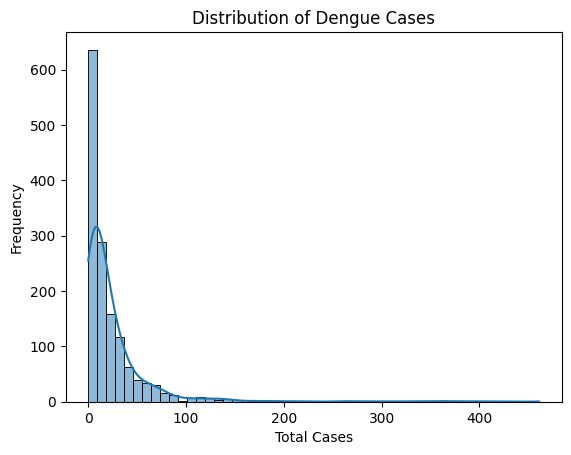

<Axes: xlabel='week_start_date', ylabel='total_cases'>

Text(0.5, 1.0, 'Time Series of Dengue Cases')

Text(0.5, 0, 'Week Start Date')

Text(0, 0.5, 'Total Cases')

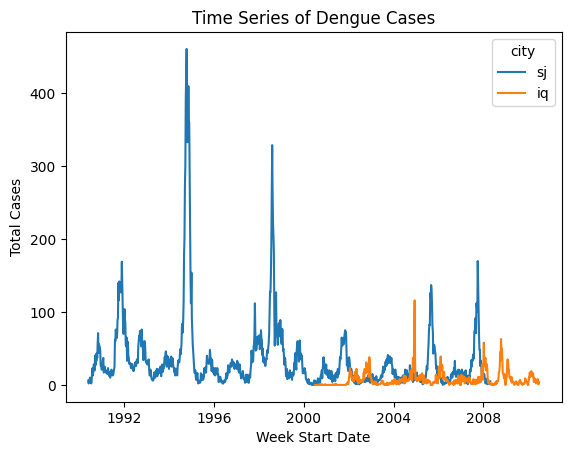

<Figure size 2000x2000 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix')

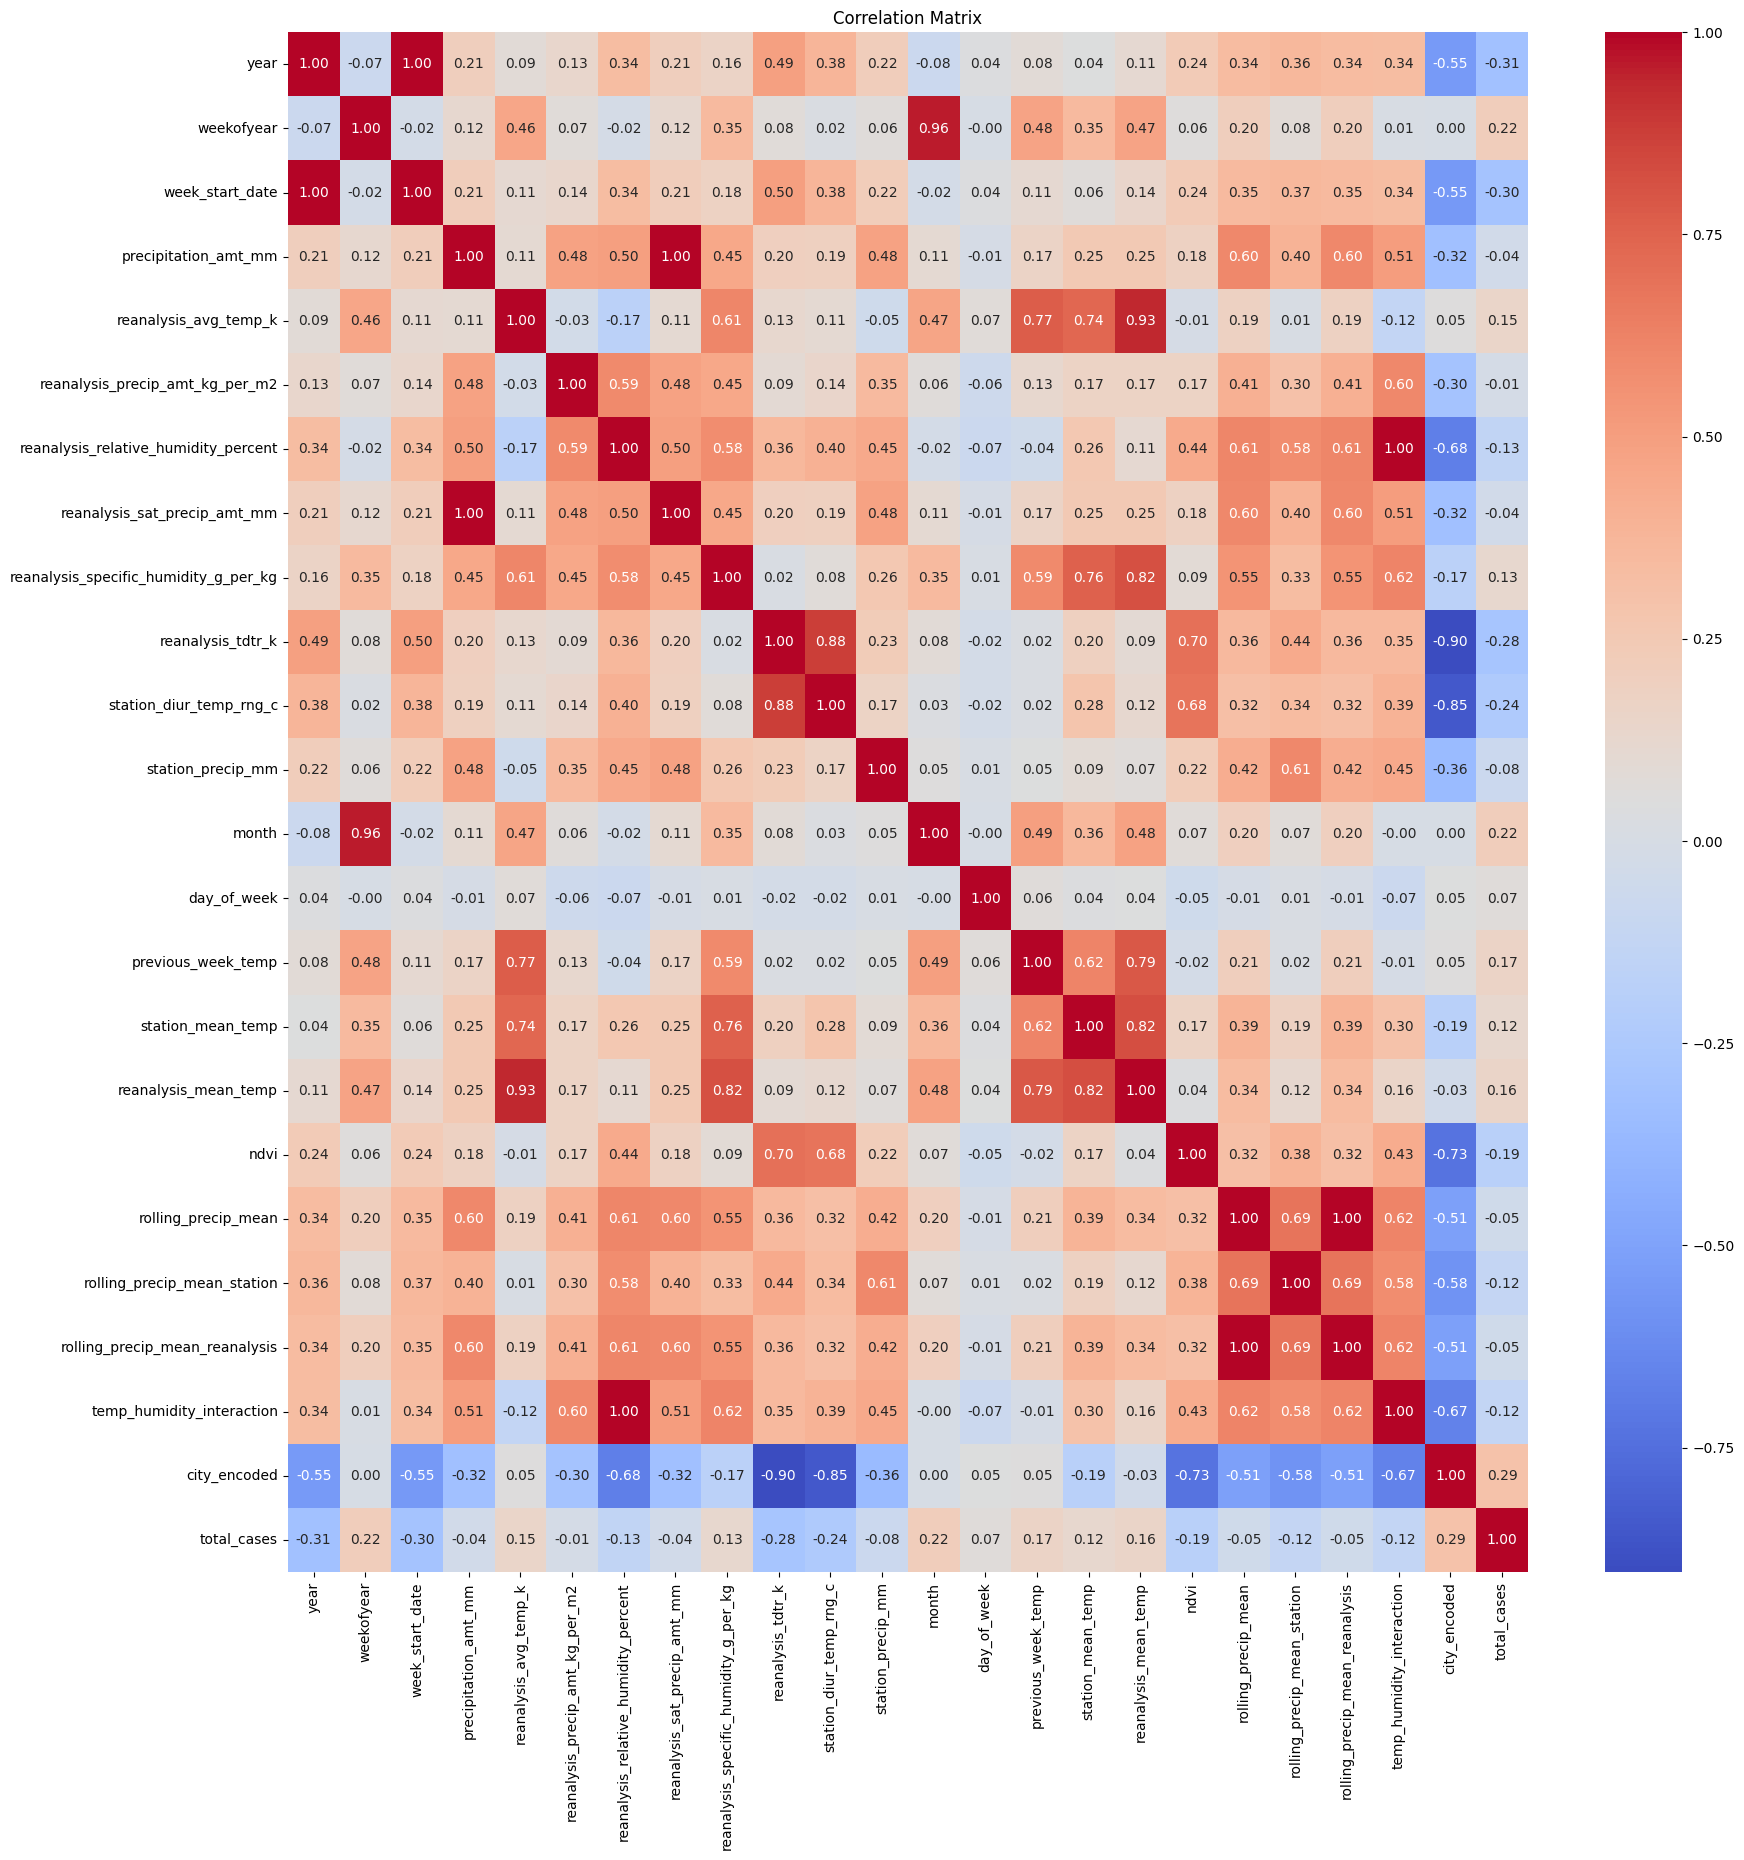

<Axes: xlabel='city', ylabel='total_cases'>

Text(0.5, 1.0, 'Distribution of Dengue Cases by City')

Text(0.5, 0, 'City')

Text(0, 0.5, 'Total Cases')

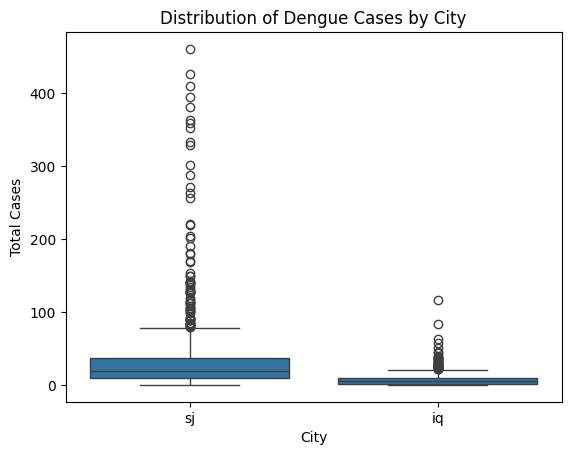

In [205]:
# Histograms
sns.histplot(data=dengue_feature_train_data, x='total_cases', bins=50, kde=True)
plt.title('Distribution of Dengue Cases')
plt.xlabel('Total Cases')
plt.ylabel('Frequency')
plt.show()

# Time Series Plot
sns.lineplot(data=dengue_feature_train_data, x='week_start_date', y='total_cases', hue='city')
plt.title('Time Series of Dengue Cases')
plt.xlabel('Week Start Date')
plt.ylabel('Total Cases')
plt.show()

# Correlation Matrix
plt.figure(figsize=(20,20))
Corr_data = dengue_feature_train_data.drop(columns=['city'])
correlation_matrix = Corr_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Boxplot
sns.boxplot(data=dengue_feature_train_data, x='city', y='total_cases')
plt.title('Distribution of Dengue Cases by City')
plt.xlabel('City')
plt.ylabel('Total Cases')
plt.show()


From the above graphs we can find the correlation and variance of the data\
We can provide more importance to the features which are more correlated to total_cases


In [206]:
dengue_feature_train_data.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'precipitation_amt_mm',
       'reanalysis_avg_temp_k', 'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_diur_temp_rng_c', 'station_precip_mm', 'month', 'day_of_week',
       'previous_week_temp', 'station_mean_temp', 'reanalysis_mean_temp',
       'ndvi', 'rolling_precip_mean', 'rolling_precip_mean_station',
       'rolling_precip_mean_reanalysis', 'temp_humidity_interaction',
       'city_encoded', 'total_cases'],
      dtype='object')

<Axes: >

Text(0.5, 1.0, 'Correlations for Train data')

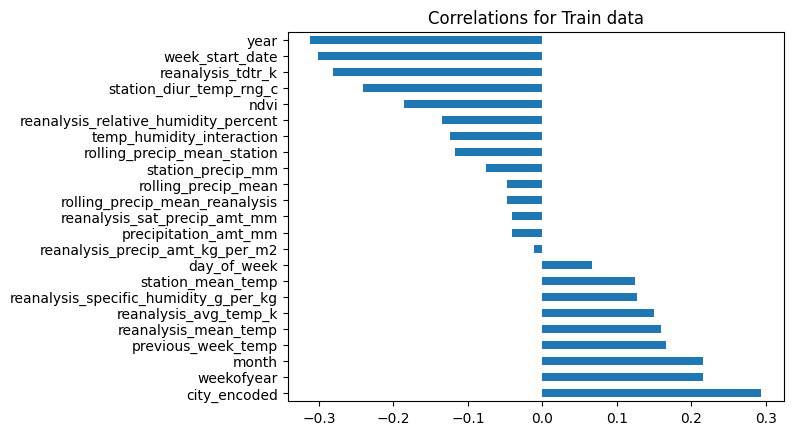

In [207]:
Corr_data_train = dengue_feature_train_data.drop(columns=['city'])
correlations_train = Corr_data_train.corr()

(correlations_train['total_cases'].drop('total_cases').sort_values(ascending=False).plot.barh())
plt.title('Correlations for Train data')

In [208]:
# Filter correlations less than 0.1
low_correlation_columns = correlations_train[(correlations_train['total_cases'] < 0.1) & (-0.1 < correlations_train['total_cases'])]

# Extract column names
low_correlation_column_names = low_correlation_columns.index.tolist()

dengue_feature_train_data = dengue_feature_train_data.drop(columns=low_correlation_column_names)
dengue_feature_test_data = dengue_feature_test_data.drop(columns=low_correlation_column_names)
dengue_feature_train_data.columns

Index(['city', 'year', 'weekofyear', 'week_start_date',
       'reanalysis_avg_temp_k', 'reanalysis_relative_humidity_percent',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_diur_temp_rng_c', 'month', 'previous_week_temp',
       'station_mean_temp', 'reanalysis_mean_temp', 'ndvi',
       'rolling_precip_mean_station', 'temp_humidity_interaction',
       'city_encoded', 'total_cases'],
      dtype='object')

In [209]:
dengue_feature_train_data = dengue_feature_train_data.drop(columns='week_start_date')
# dengue_feature_test_data = dengue_feature_test_data.drop(columns='week_start_date')
dengue_feature_train_data.columns

Index(['city', 'year', 'weekofyear', 'reanalysis_avg_temp_k',
       'reanalysis_relative_humidity_percent',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_diur_temp_rng_c', 'month', 'previous_week_temp',
       'station_mean_temp', 'reanalysis_mean_temp', 'ndvi',
       'rolling_precip_mean_station', 'temp_humidity_interaction',
       'city_encoded', 'total_cases'],
      dtype='object')

Week start data have to be remove because we have create other features using that

In [210]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Define numerical features
numerical_features = ['year', 'weekofyear',
       'reanalysis_avg_temp_k', 'reanalysis_relative_humidity_percent',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_diur_temp_rng_c', 'month', 'previous_week_temp',
       'station_mean_temp', 'reanalysis_mean_temp', 'ndvi',
       'rolling_precip_mean_station', 'temp_humidity_interaction',
       'city_encoded']

# Fit scaler on training data and transform both training and testing data
# dengue_feature_train_data[numerical_features] = scaler.fit_transform(dengue_feature_train_data[numerical_features])
# dengue_feature_test_data[numerical_features] = scaler.transform(dengue_feature_test_data[numerical_features])


In [211]:
dengue_feature_train_data.head()

,city,year,weekofyear,reanalysis_avg_temp_k,reanalysis_relative_humidity_percent,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_diur_temp_rng_c,month,previous_week_temp,station_mean_temp,reanalysis_mean_temp,ndvi,rolling_precip_mean_station,temp_humidity_interaction,city_encoded,total_cases
0,sj,1990,22,299.664286,80.460000,17.210000,3.014286,9.371429,5,299.228571,302.430952,298.685000,0.239235,15.16,24099.264257,1,6
1,sj,1990,23,299.764286,79.891429,17.212857,2.100000,6.942857,6,299.664286,301.954762,298.995357,0.191364,19.78,23937.868743,1,2
2,sj,1990,24,299.221429,82.000000,17.234286,2.042857,6.771429,6,299.764286,300.788095,298.518214,0.155261,24.00,24534.985714,1,4
3,sj,1990,25,299.528571,83.375714,17.977143,1.571429,7.685714,6,299.221429,301.507143,298.780714,0.107375,19.94,24978.649351,1,5
4,sj,1990,26,299.557143,82.768571,17.790000,1.885714,7.385714,6,299.528571,301.492857,298.939286,0.124449,23.36,24795.690388,1,10


In [212]:
# dengue_feature_train_data = dengue_feature_train_data.drop(columns='week_start_date')
# dengue_feature_test_data = dengue_feature_test_data.drop(columns='week_start_date')

In [213]:
# Separate data for each city  sj for San Juan and iq for Iquitos

San_Juan_data = dengue_feature_train_data[dengue_feature_train_data['city'] == 'sj']
Iquitos_data = dengue_feature_train_data[dengue_feature_train_data['city'] == 'iq']

San_Juan_test = dengue_feature_test_data[dengue_feature_test_data['city'] == 'sj']
Iquitos_test = dengue_feature_test_data[dengue_feature_test_data['city'] == 'iq']

In [214]:
San_Juan_data = San_Juan_data.drop(columns='city')
Iquitos_data = Iquitos_data.drop(columns='city')
San_Juan_test = San_Juan_test.drop(columns=['city','city_encoded'])
Iquitos_test = Iquitos_test.drop(columns=['city','city_encoded'])

In [215]:
San_Juan_data.columns

Index(['year', 'weekofyear', 'reanalysis_avg_temp_k',
       'reanalysis_relative_humidity_percent',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_diur_temp_rng_c', 'month', 'previous_week_temp',
       'station_mean_temp', 'reanalysis_mean_temp', 'ndvi',
       'rolling_precip_mean_station', 'temp_humidity_interaction',
       'city_encoded', 'total_cases'],
      dtype='object')

In [216]:
San_Juan_data.shape

(932, 16)

In [217]:
Iquitos_test.columns

Index(['year', 'weekofyear', 'week_start_date', 'reanalysis_avg_temp_k',
       'reanalysis_relative_humidity_percent',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_diur_temp_rng_c', 'month', 'previous_week_temp',
       'station_mean_temp', 'reanalysis_mean_temp', 'ndvi',
       'rolling_precip_mean_station', 'temp_humidity_interaction'],
      dtype='object')

In [218]:
from sklearn.model_selection import train_test_split

# Split data into features and target variable
San_Juan_y = San_Juan_data['total_cases']
San_Juan_X = San_Juan_data.drop(columns=['total_cases','city_encoded'])

Iquitos_y = Iquitos_data['total_cases']
Iquitos_X = Iquitos_data.drop(columns=['total_cases','city_encoded'])

# Split data into training and testing sets
San_Juan_X_train, San_Juan_X_test, San_Juan_y_train, San_Juan_y_test = train_test_split(San_Juan_X, San_Juan_y, test_size=0.2, random_state=49)
Iquitos_X_train, Iquitos_X_test, Iquitos_y_train, Iquitos_y_test = train_test_split(Iquitos_X, Iquitos_y, test_size=0.2, random_state=49)

In [219]:
print(San_Juan_X_train.shape)
print(San_Juan_X_test.shape)
print(San_Juan_y_train.shape)
print(San_Juan_y_test.shape)

(745, 14)
(187, 14)
(745,)
(187,)


In [220]:
San_Juan_y_train

8        6
100     24
52      15
930      3
440     67
      ... 
182     25
501     23
424    191
685     18
426    329
Name: total_cases, Length: 745, dtype: int64

In [221]:
##SAN JUAN
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
import time as time

train_size = 100
svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5,
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3],
                               "gamma": np.logspace(-2, 2, 5)})

t0 = time.time()
svr.fit(San_Juan_X_train,San_Juan_y_train)
svr_fit = time.time() - t0
print("SVR complexity and bandwidth selected and model fitted in %.3f s"
      % svr_fit)
model_sj=svr.best_estimator_
print(model_sj)

GridSearchCV(cv=5, estimator=SVR(gamma=0.1),
             param_grid={'C': [1.0, 10.0, 100.0, 1000.0],
                         'gamma': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])})

SVR complexity and bandwidth selected and model fitted in 6.185 s
SVR(C=100.0, gamma=0.01)


In [222]:
# Assuming you have test data San_Juan_X_test for San Juan and you want to make predictions
y_pred = model_sj.predict(San_Juan_X_test)
y_pred_sj = [int(pred.round()) for pred in y_pred]
# Print or use predictions_sj as needed
print(y_pred_sj)


[29, 26, 28, 24, 36, 21, 29, 28, 26, 26, 37, 28, 33, 30, 31, 30, 26, 32, 39, 29, 26, 18, 17, 29, 28, 29, 35, 51, 29, 29, 33, 29, 25, 29, 29, 33, 28, 27, 30, 30, 29, 38, 34, 28, 29, 28, 13, 29, 33, 29, 15, 27, 28, 17, 23, 37, 26, 15, 28, 28, 28, 26, 30, 27, 46, 27, 29, 44, 26, 25, 29, 29, 23, 20, 27, 29, 28, 26, 27, 28, 29, 26, 30, 25, 29, 33, 46, 37, 29, 27, 24, 28, 14, 29, 46, 30, 29, 16, 25, 27, 28, 27, 29, 41, 23, 31, 29, 28, 34, 17, 14, 28, 29, 31, 29, 32, 17, 29, 58, 22, 35, 22, 43, 29, 25, 29, 28, 29, 40, 29, 32, 22, 24, 29, 47, 40, 30, 21, 29, 29, 29, 32, 29, 28, 17, 28, 27, 26, 7, 29, 29, 29, 37, 29, 27, 16, 28, 29, 26, 29, 27, 48, 37, 29, 29, 32, 27, 21, 29, 28, 26, 26, 28, 60, 28, 33, 29, 29, 29, 29, 25, 28, 14, 27, 40, 28, 28]


In [223]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Mean Absolute Error (MAE)
mae = mean_absolute_error(San_Juan_y_test, y_pred_sj)

print("Mean Absolute Error (MAE):", mae)


Mean Absolute Error (MAE): 25.46524064171123


In [224]:
##IQUITOS
train_size = 100
svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5,
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3],
                               "gamma": np.logspace(-2, 2, 5)})

t0 = time.time()
svr.fit(Iquitos_X_train,Iquitos_y_train)
svr_fit = time.time() - t0
print("SVR complexity and bandwidth selected and model fitted in %.3f s"
      % svr_fit)
model_iq=svr.best_estimator_
print(model_iq)

GridSearchCV(cv=5, estimator=SVR(gamma=0.1),
             param_grid={'C': [1.0, 10.0, 100.0, 1000.0],
                         'gamma': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])})

SVR complexity and bandwidth selected and model fitted in 2.492 s
SVR(C=100.0, gamma=0.01)


In [225]:
# Assuming you have test data San_Juan_X_test for San Juan and you want to make predictions
y_pred = model_sj.predict(Iquitos_X_test)
y_pred_iq = [int(pred.round()) for pred in y_pred]
# Print or use predictions_sj as needed
print(y_pred_iq)

[29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 34, 29, 29, 27, 29, 29, 29, 28, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 31, 29, 29, 29, 29, 29, 29, 27, 29, 29, 30, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 32, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 28, 29, 29, 29, 29, 29, 29, 29, 28, 29, 29, 31, 26, 29, 29, 29, 29, 29, 29]


In [226]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Mean Absolute Error (MAE)
mae = mean_absolute_error(Iquitos_y_test, y_pred_iq)

print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 23.432692307692307


In [227]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest regressor
rf_model = RandomForestRegressor(n_estimators=100,criterion='poisson', random_state=49)

X_train_scaled = scaler.fit_transform(San_Juan_X_train)
X_test_scaled = scaler.transform(San_Juan_X_test)

# Fit the model
rf_model.fit(X_train_scaled, San_Juan_y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test_scaled)


RandomForestRegressor(criterion='poisson', random_state=49)

In [228]:

rf_predictions = np.round(rf_predictions)
rf_predictions

array([ 76.,  10.,   3.,  14.,  28.,  31.,  20.,  12.,  77.,   6.,  12.,
         8.,  38.,   4.,  59.,  61.,  34.,  46.,  34.,  17.,   7.,  10.,
         9.,  10., 161.,  74.,  75.,  36., 299.,   7.,  22.,  10.,  13.,
        58.,  10.,  33.,  25.,   2., 159., 229.,  41.,  92.,  52.,   9.,
         9.,  33.,   7.,  26., 100.,  29.,  21.,  35.,  27.,  14.,  20.,
        34.,  11.,   8.,  24.,  23.,   9.,  58.,  36.,  10.,  29.,  12.,
        89.,  11.,  28., 100.,  61.,   6.,  65.,  11.,  26.,   7.,  68.,
        23.,  33.,   5.,  35.,   8.,   8.,  30.,   8.,  46.,  65.,  35.,
         9.,   5.,   9.,  24.,   8.,  36., 102.,  59.,  22.,   7.,  32.,
         9.,  51.,  75.,  30.,  43.,  23.,  34.,  21.,  34.,  49.,  12.,
        20.,  21.,  29.,  12.,  31.,  29.,  95.,   5.,  15.,   6.,  90.,
        13.,  29.,  26.,   8.,  96.,  37.,  22.,  29.,  47.,  25.,  28.,
         6.,  50.,  59.,  35.,  66.,  21.,  12.,   7.,  21.,  85.,  14.,
        48.,   8.,  24.,  26.,  38.,   4.,   5.,  9

In [229]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(San_Juan_y_test, rf_predictions)

print("Mean Absolute Error:", mae)


Mean Absolute Error: 13.363636363636363


In [235]:
# Make predictions for San
San_Juan_test = San_Juan_test.drop(columns='week_start_date')
X_test_scaled = scaler.transform(San_Juan_test)
rf_predictions = rf_model.predict(X_test_scaled)
rf_predictions = np.round(rf_predictions)
rf_predictions.shape

(256,)

In [236]:
dengue_feature_test_data.columns

Index(['city', 'year', 'weekofyear', 'week_start_date',
       'reanalysis_avg_temp_k', 'reanalysis_relative_humidity_percent',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_diur_temp_rng_c', 'month', 'previous_week_temp',
       'station_mean_temp', 'reanalysis_mean_temp', 'ndvi',
       'rolling_precip_mean_station', 'temp_humidity_interaction',
       'city_encoded'],
      dtype='object')

<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Week Start Date')

Text(0, 0.5, 'Predicted Values')

Text(0.5, 1.0, 'Predicted Values vs Week Start Date for San Juan')

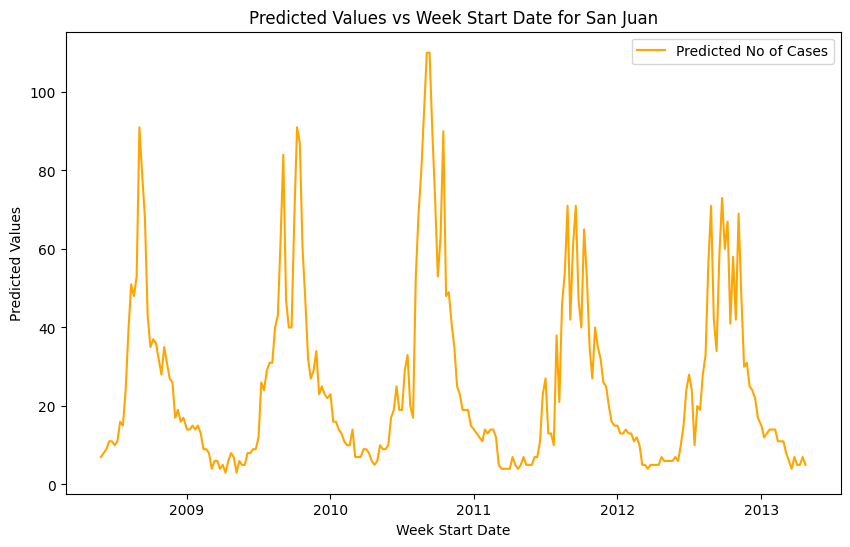

In [237]:
filtered_data = dengue_feature_test_data[dengue_feature_test_data['city'] == 'sj']

# Plot the predicted values and the existing column
plt.figure(figsize=(10, 6))
plt.plot(filtered_data['week_start_date'], rf_predictions, label='Predicted No of Cases', color='orange')
plt.xlabel('Week Start Date')
plt.ylabel('Predicted Values')
plt.title('Predicted Values vs Week Start Date for {}'.format('San Juan'))
plt.legend()
plt.show()



In [238]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest regressor
rf_model = RandomForestRegressor(n_estimators=100,criterion='poisson', random_state=49)

X_train_scaled = scaler.fit_transform(Iquitos_X_train)
X_test_scaled = scaler.transform(Iquitos_X_test)

# Fit the model
rf_model.fit(X_train_scaled, Iquitos_y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test_scaled)


RandomForestRegressor(criterion='poisson', random_state=49)

In [239]:

rf_predictions = np.round(rf_predictions)
rf_predictions

array([15., 14.,  2., 14.,  2.,  6.,  0., 10.,  2., 12.,  0.,  5., 11.,
       22., 26.,  4.,  3.,  5.,  2.,  5.,  2.,  2.,  4.,  4.,  4.,  7.,
        5., 17.,  7.,  3.,  7., 19., 21., 12.,  0.,  3.,  5.,  0.,  8.,
        6., 10.,  9.,  6., 11.,  0., 10., 12.,  2.,  0.,  7.,  6., 10.,
        5.,  4.,  6.,  6., 19.,  4., 16.,  7.,  3.,  4., 11.,  4.,  4.,
        6.,  9.,  6.,  3., 19.,  5.,  6.,  0.,  0.,  0.,  5.,  8.,  9.,
        2., 11., 17.,  7.,  9., 17.,  0.,  0.,  8.,  3.,  4.,  8.,  5.,
       12.,  7.,  6., 11.,  6.,  9.,  6.,  8., 12.,  6.,  6.,  4.,  7.])

In [240]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(Iquitos_y_test, rf_predictions)

print("Mean Absolute Error:", mae)

Mean Absolute Error: 5.3173076923076925


In [241]:
# Make predictions
Iquitos_test = Iquitos_test.drop(columns='week_start_date')
X_test_scaled = scaler.transform(Iquitos_test)
rf_predictions = rf_model.predict(X_test_scaled)
rf_predictions = np.round(rf_predictions)
rf_predictions.shape

(156,)

<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Week Start Date')

Text(0, 0.5, 'Predicted Values')

Text(0.5, 1.0, 'Predicted Values vs Week Start Date for Iquitos')

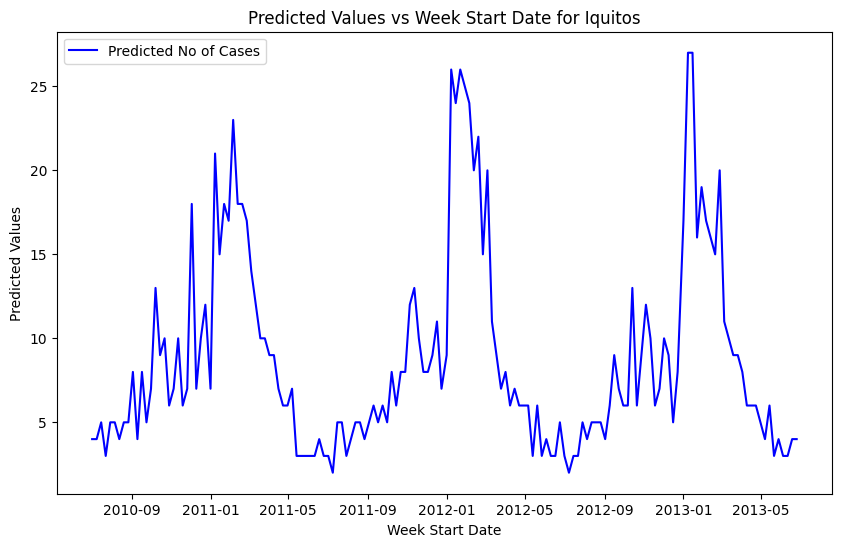

In [242]:
filtered_data = dengue_feature_test_data[dengue_feature_test_data['city'] == 'iq']

# Plot the predicted values and the existing column
plt.figure(figsize=(10, 6))
plt.plot(filtered_data['week_start_date'], rf_predictions, label='Predicted No of Cases', color='blue')
plt.xlabel('Week Start Date')
plt.ylabel('Predicted Values')
plt.title('Predicted Values vs Week Start Date for {}'.format('Iquitos'))
plt.legend()
plt.show()